# Import Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10,5)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/NewspaperData.csv")
df.head()

In [ ]:
df

In [ ]:
# select required columns only
df = df[['daily','sunday']]
df

In [ ]:
df.info()

# Correlation Analysis

<Axes: xlabel='daily', ylabel='sunday'>

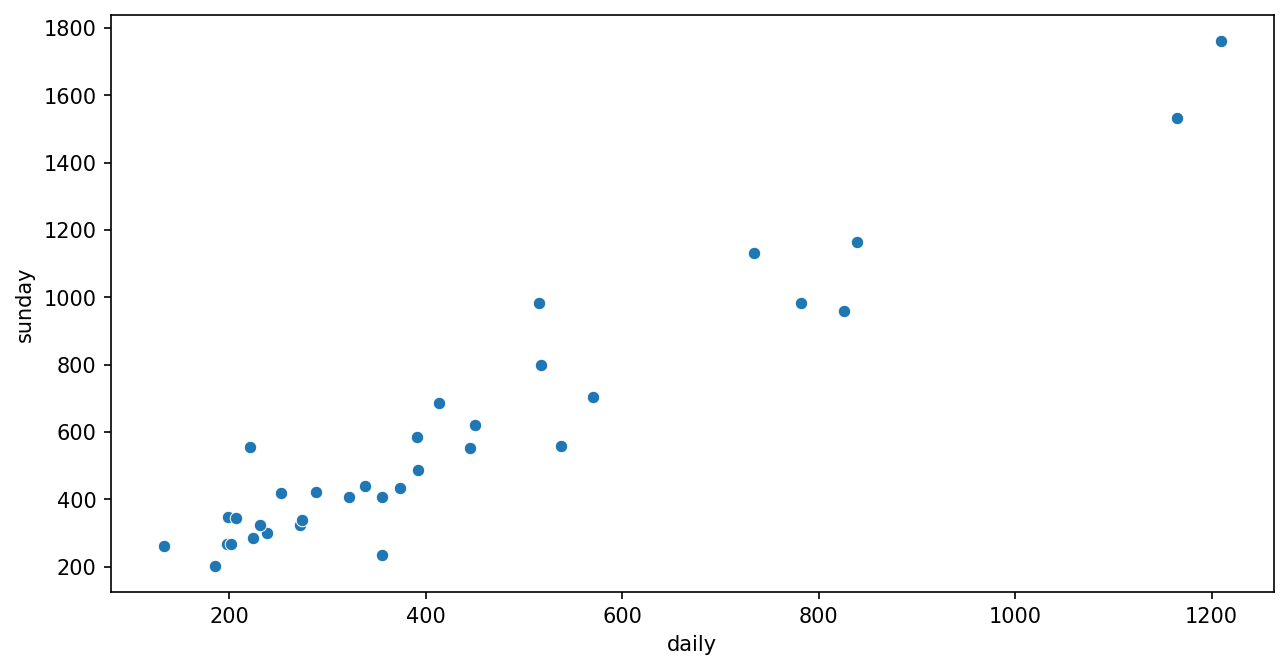

In [6]:
sns.scatterplot(x = df['daily'], y = df['sunday'])

In [7]:
df.corr() # check daily vs sunday

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
sns.distplot(df['daily']) # density plot for daily - positive skewness in data

In [ ]:
sns.distplot(df['sunday']) # density plot for sunday - positive skewness in data

Fitting a Linear Regression Model

In [12]:
import statsmodels.formula.api as smf # model - Regression model, "Y~X", OR "Dependent_variable~Independent_Variable"
model = smf.ols("sunday~daily",data = df).fit() # Ordinary Least Squares, y Dep. variable - sunday, then give ~ symbol and then x Ind.Variable - daily,
                                                  # dataset - data, fit() - fit the regression line

In [13]:
#Coefficients are B0 and B1
model.params
# Reg. Equn: Sunday = B0+B1*daily
# In output: Intercept(i.e. best fit line is intersecting y axis at 13.83) - B0, daily - coefficient of daily i.e.B1
# Sunday = 13.83 + 1.33 * daily
# we assumed daily circulation as 200
# So Sunday = 13.83 + 1.33 * 200

Intercept    13.835630
daily         1.339715
dtype: float64

In [14]:
sun=13.83+1.33*200
sun

279.83

In [15]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)
# we have estimates: B0=13.8, B1=1.33. We have t-value 0.38 and 18.93, p-value - 0.7, 6.01 is approx.= 0
#focus on B1. B1 is slope. Define H0 and H1. H0: B1=0 i.e. No effect of x on y, Ha: B1!=0 i.e. There exists significant effect of x on y.
# Here P < Alfa so reject H0 and accept Ha which means Daily variable has significant effect on Sunday variable.

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [16]:
#R squared values - 0.92 - Good reg. equn.
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

In [ ]:
# model.summary() # OLS - Ordinary Least Squares

In [ ]:
sns.regplot(x="daily", y="sunday", data=df)

In [ ]:
#1100 manual calculation
(1.3*1100)+13.835630

1443.83563

In [ ]:
# predict value for 150,240

# Predict for new data point

In [18]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300]) # x value is (daily circulation) 200 at one branch and 300 at another branch

In [ ]:
newdata

In [20]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [ ]:
data_pred

In [22]:
model.predict(data_pred) # model - regression model

0    281.778581
1    415.750057
dtype: float64

# **Data Transformation**

1.   Sqrt
2.   Log



**1. Log Transformation**

In [ ]:
df

In [ ]:
# To overcome the effect of outliers perform transformations. Skewed Histogram will become approximately equal to normal
# Log of every column can be taken. It doesn't change the pattern/information in data but changes values to different scales.
df['log_daily'] = np.log(df['daily'])
df

In [ ]:
df['log_sunday'] = np.log(df['sunday'])
df

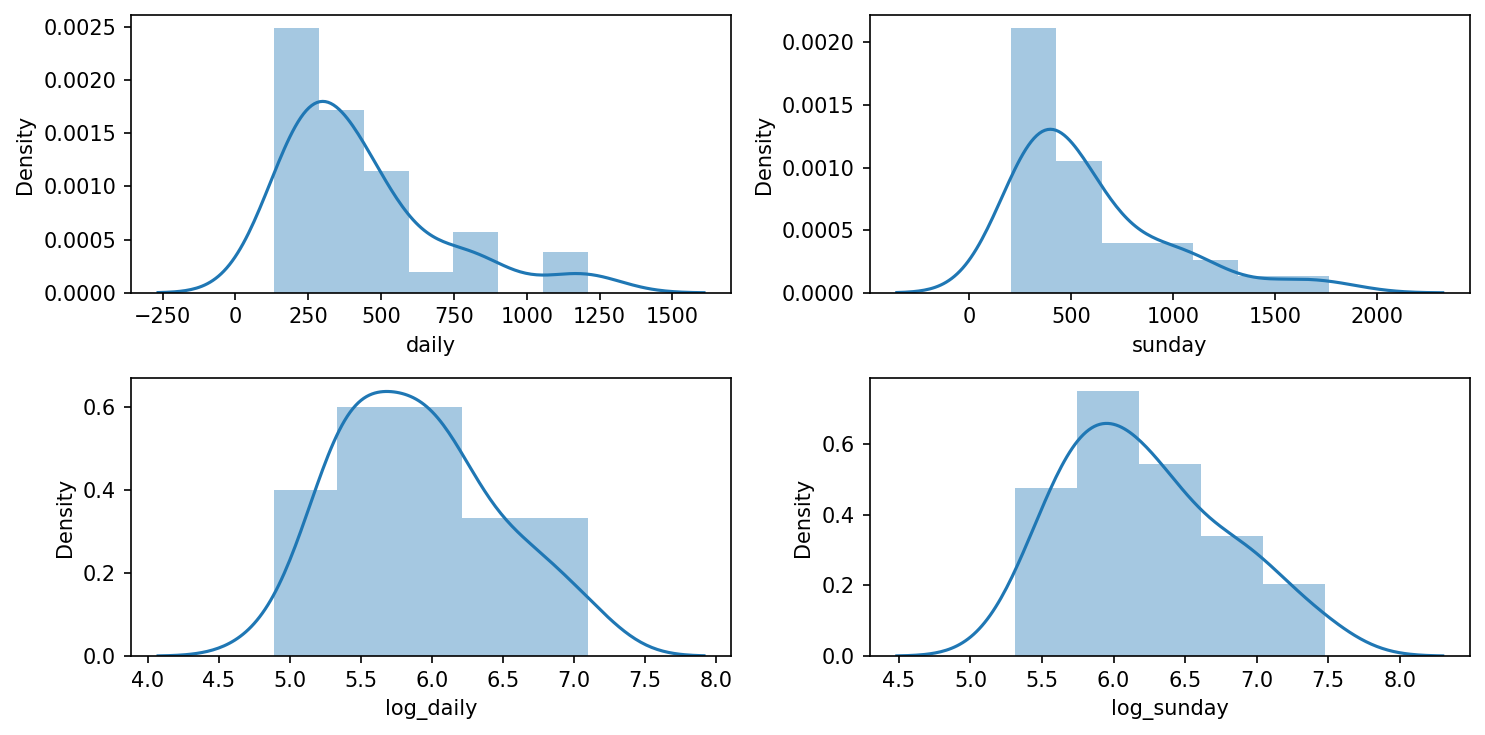

In [27]:
plt.subplot(2,2,1)
sns.distplot(df['daily'])

plt.subplot(2,2,2)
sns.distplot(df['sunday'])

plt.subplot(2,2,3)
sns.distplot(df['log_daily'])

plt.subplot(2,2,4)
sns.distplot(df['log_sunday'])

plt.tight_layout()
# as compared to previous graphs, skewness is reduced.

In [ ]:
df['log_daily'].skew(), df['log_sunday'].skew() # moderate skewness is there
# To remove all skewness we have to remove all outliers from data

(0.4682202000020356, 0.5337572087816101)

In [ ]:
df['daily'].skew(), df['sunday'].skew() # High skewness.

(1.5321591323040094, 1.5644730738925112)

# **2. Sqrt Transformation**
comparatively less effective than log transformation

In [ ]:
df['sqrt_daily'] = np.sqrt(df['daily'])
df['sqrt_sunday'] = np.sqrt(df['sunday'])
df

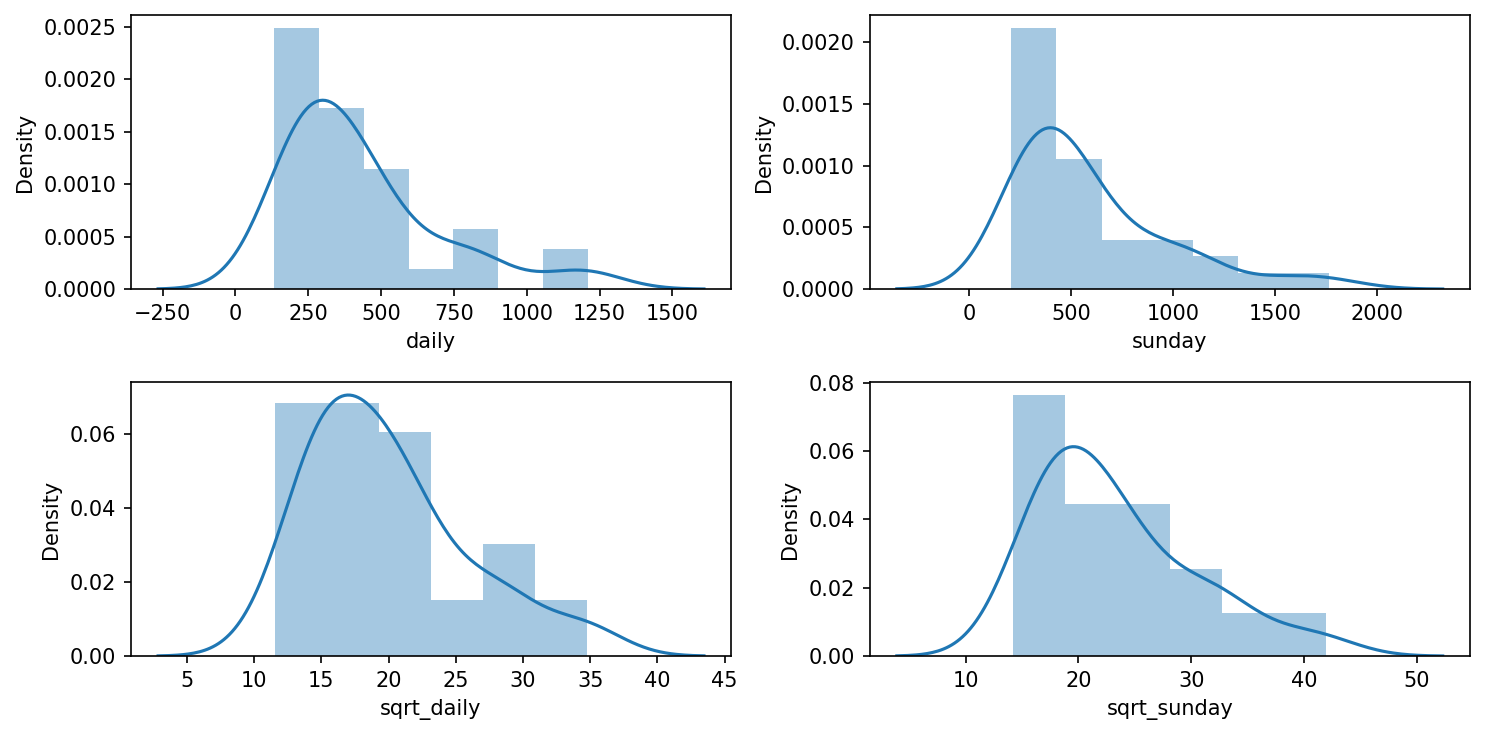

In [29]:
plt.subplot(2,2,1)
sns.distplot(df['daily'])

plt.subplot(2,2,2)
sns.distplot(df['sunday'])

plt.subplot(2,2,3)
sns.distplot(df['sqrt_daily'])

plt.subplot(2,2,4)
sns.distplot(df['sqrt_sunday'])

plt.tight_layout()

In [ ]:
df['sqrt_daily'].skew(), df['sqrt_sunday'].skew()

(1.0075247084922163, 1.0392935145699538)